# Réalisation de graphiques avec matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st

Pour illustrer quelques premières méthodes pour gérer des graphiques représentant des données on va s'appuyer sur des données simulées grâce à la librairie `scipy.stats`. Dans l'ensemble de cette présentation il n'est pas attendu que vous maîtrisiez les méthodes utilisées pour réaliser ces simulations. Ici nous allons simuler des données suivant le comportement d'une loi normale (ou loi de Gauss) pour laquelle on doit simplement comprendre qu'elle permet d'obtenir une distribution particulière correspondant à une variable continue dont on a fixé la moyenne et l'écart type (on pourra remarquer que la distribution est symétrique par rapport à la valeur de la moyenne et observer comment la valeur de l'écart type agit sur cette distribution). Dans les exemples suivants le vecteur `vect_simu_nor` représente un vecteur représentant un certain nombre de valeurs simulées obéissant à ces contraintes et pour lequel on va chercher à représenter la distribution par la réalisation d'un histogramme (vas-y on n'a qu'à dire que ce sont des durées de film par exemple).

In [3]:
moyenne=100
ecart_type=10
taille_ech_simu=100
vect_simu_nor=st.norm.rvs(moyenne,ecart_type,size=taille_ech_simu)

Pour réaliser un histogramme il suffit d'utiliser la méthode `plt.hist` ici utilisée avec les arguments `rwidth=0.9` pour indiquer que les barres doivent occuper 90% de chaque intervalle et `ec='black'` pour marquer en noir le contour de chaque barre représentée

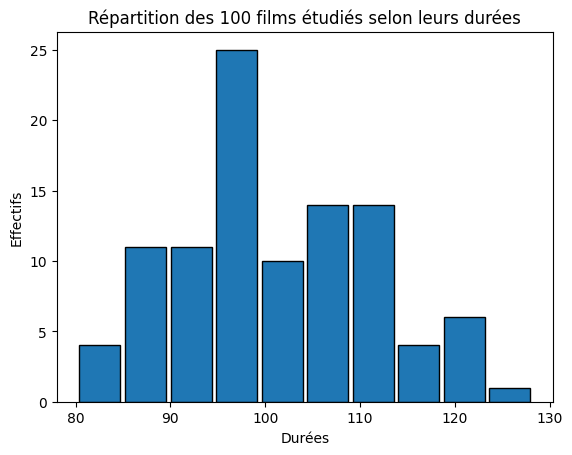

Effectifs représentés en ordonnées=[ 4. 11. 11. 25. 10. 14. 14.  4.  6.  1.]
Les bornes des intervalles utilisés en abscisses pour classifier les valeurs simulées=[ 80.1760939   84.97787712  89.77966034  94.58144357  99.38322679
 104.18501001 108.98679323 113.78857646 118.59035968 123.3921429
 128.19392612]


In [4]:
effectifs,intervalles,_=plt.hist(vect_simu_nor,rwidth=0.9,ec='black')
plt.title(f'Répartition des {taille_ech_simu} films étudiés selon leurs durées')
plt.xlabel('Durées')
plt.ylabel('Effectifs')
plt.show()#Cette commande est lancée par défaut lorsqu'on exécute une cellule dans un Notebook
print(f'Effectifs représentés en ordonnées={effectifs}')
print(f'Les bornes des intervalles utilisés en abscisses pour classifier les valeurs simulées={intervalles}')

Déjà on est pas mal contents de savoir faire ça mais on peut regretter que les bornes déterminées par défaut ne soient pas très lisibles (avec un choix par défaut pour l'argument `bin=10` qui correspond à 10 intervalles déterminés avec comme première borne le minimum de la série et en dernière borne le maximum ) et que ces bornes ne coïncident pas du tout avec les étiquettes placées en abscisses.\
Dans la représentation suivante le choix a été fait de forcer les bornes à être des multiples de 5 en partant du premier inférieur à la valeur minimale jusqu'au premier supérieur à la valeur maximale (les valeurs obtenues sont converties en entier par souci d'esthétisme dans la représentation des étiquettes)

72.06015147258591 121.11019900744252


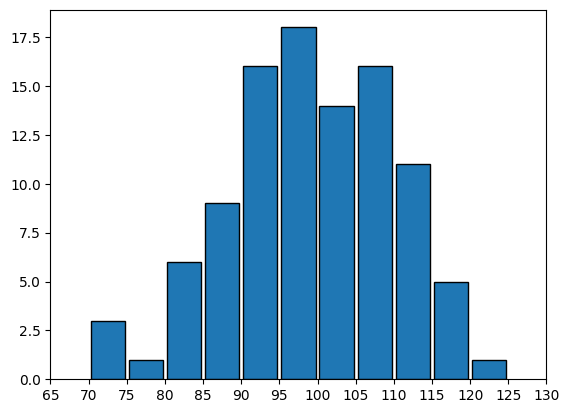

In [5]:
vect_simu_nor=st.norm.rvs(moyenne,ecart_type,size=taille_ech_simu)
print(vect_simu_nor.min(),vect_simu_nor.max())
min_xgraph=np.floor(vect_simu_nor.min()/5)*5
min_xgraph=min_xgraph.astype(int)
max_xgraph=np.floor(vect_simu_nor.max()/5)*5+5
max_xgraph=max_xgraph.astype(int)
liste_bornes=[b for b in range(min_xgraph,max_xgraph+5,5)]
liste_xticks=[liste_bornes[0]-5]+liste_bornes+[liste_bornes[-1]+5] #on fait le choix de rajouter deux étiquettes en début et fin
plt.hist(vect_simu_nor,bins=liste_bornes,rwidth=0.9,ec='black')
plt.gca().set_xticks(liste_xticks) #gca() permet de récupérer l'objet axes pour lequel on impose ici l'emplacement des étiquettes
plt.show()

## Réalisation de plusieurs graphiques dans une même figure
### Avec `subplot`

Cette méthode permet d'ajouter un à un des graphiques en spécifiant l'emplacement auquel il doit être ajouté. Dans l'exemple ci-dessous on définit que les graphiques occupent des emplacements sur deux lignes et 3 colonnes et ces emplacements sont indexés de 1 à 6 (1 à 3 pour la première ligne et 4 à 6 pour la deuxième ligne).

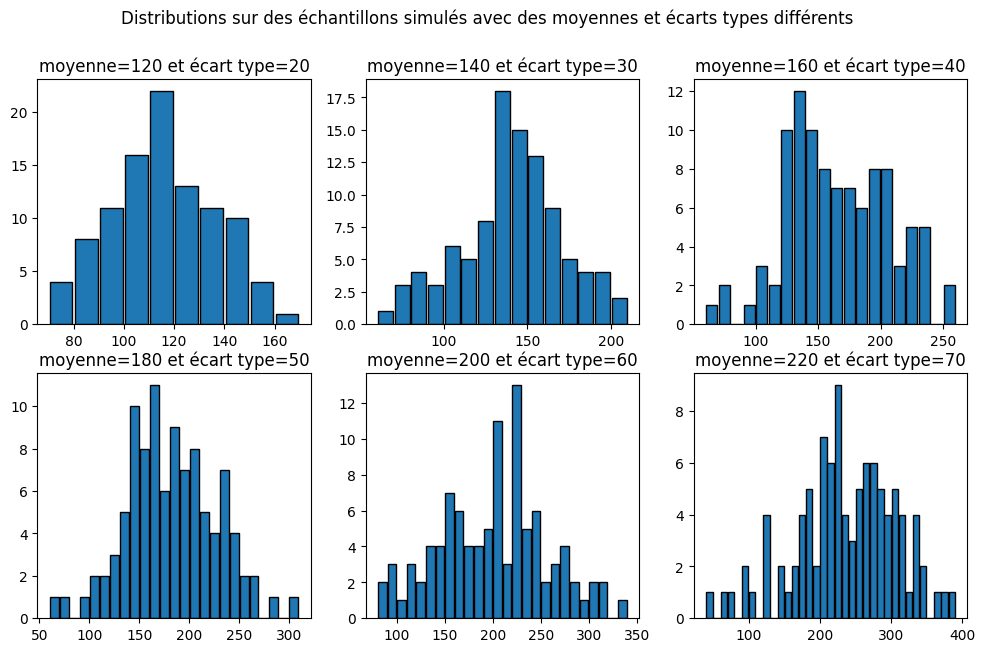

In [6]:
fig=plt.figure(figsize=(12,7))
fig.suptitle('Distributions sur des échantillons simulés avec des moyennes et écarts types différents', fontsize=12)
moyenne=100
ecart_type=10
taille_ech_simu=100
for i in range(1,7):
    plt.subplot(2,3,i)
    moyenne=moyenne+20
    ecart_type=ecart_type+10
    vect_simu_nor=st.norm.rvs(moyenne,ecart_type,size=taille_ech_simu)
    min_xgraph=np.floor(vect_simu_nor.min()/10)*10
    min_xgraph=min_xgraph.astype(int)
    max_xgraph=np.floor(vect_simu_nor.max()/10)*10+10
    max_xgraph=max_xgraph.astype(int)
    liste_bornes=[b for b in range(min_xgraph,max_xgraph+10,10)]
    plt.hist(vect_simu_nor,bins=liste_bornes,rwidth=0.9,ec='black')
    plt.title('moyenne='+str(moyenne)+" et écart type="+str(ecart_type))
plt.show()

## Avec `subplots`

Avec cette méthode cela permet de créer la figure et de renvoyer dans une matrice tous les objets `Axes` correspondant aux différents emplacements de graphiques souhaités. Cela nous permet ici une fois les 6 échantillons parcourus et les 6 graphiques créés de revenir sur ces 6 graphiques pour définir a posteriori des limites communes en abscisses et en ordonnées de sorte à bien identifier l'impact de l'évolution de la moyenne et de l'écart type dans la simulation des différents échantillons de données.

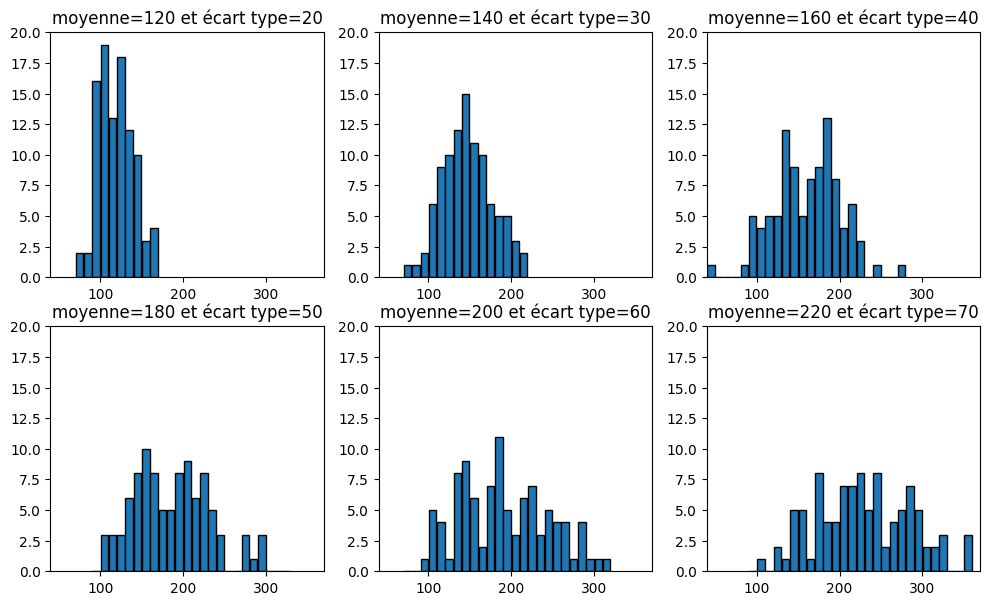

In [7]:
fig,axs=plt.subplots(2,3,figsize=(12,7))#On crée la figure contenant 6 emplacements de graphiques récupérés pour agir dessus
moyenne=100
ecart_type=10
taille_ech_simu=100
max_ordonnees=0
min_abscisses=moyenne
max_abscisses=moyenne
for i in range(2):
    for j in range(3):
        moyenne=moyenne+20
        ecart_type=ecart_type+10
        vect_simu_nor=st.norm.rvs(moyenne,ecart_type,size=taille_ech_simu)
        min_xgraph=np.round(vect_simu_nor.min()/10,0)*10
        min_xgraph=min_xgraph.astype(int)
        max_xgraph=np.round(vect_simu_nor.max()/10,0)*10+10
        max_xgraph=max_xgraph.astype(int)
        if min_xgraph<min_abscisses:
            min_abscisses=min_xgraph
        if max_xgraph>max_abscisses:
            max_abscisses=max_xgraph
        liste_bornes=[b for b in range(min_xgraph,max_xgraph,10)]
        effectifs,_,_=axs[i][j].hist(vect_simu_nor,bins=liste_bornes,rwidth=0.9,ec='black')
        axs[i][j].set_title('moyenne='+str(moyenne)+" et écart type="+str(ecart_type))
        if effectifs.max()>max_ordonnees:
            max_ordonnees=effectifs.max()
for i in range(2):
    for j in range(3):
        axs[i][j].set_ybound(lower=0,upper=max_ordonnees+1)
        axs[i][j].set_xbound(lower=min_abscisses,upper=max_abscisses)
#plt.show()

## Différents types de graphiques

### Diagramme en barres

On imagine ici une situation d'un exercice où deux joueurs de tennis, Elias et Axel, doivent atteindre une cible au service. Sur une session ils doivent effectuer 10 services et on comptabilise le nombre de réussites. L'exercice est ici répété sur 20 sesions. Les valeurs sont simulées en proposant un taux de réussite moyen de 40% pour Elias et de 60% pour Axel. On s'intéresse à la variable donnant le nombre de succès sur une session et on souhaite représenter la distribution de cette variable sur les 20 sessions. Cette variable quantitative est considérée comme discrète et le choix le plus opportun pour sa représentation semble être le diagramme en barres.\
Dans le premier exemple ci-dessous on représente la distribution pour le seul cas d'Elias. Les valeurs simulées étant renvoyées sous forme d'un tableau `numpy` on utilise une première méthode `numpy.unique` permettant de compter pour chaque valeur prise par la variable le nombre de sessions où elle a été observée (un tableau contenant deux tableaux numpy est renvoyé : le premier avec les valeurs, le deuxième avec les effectifs correspondants).\
Dans le deuxième exemple ci-dessous on souhaite représenter sur un même graphique les résultats d'Elias et ceux d'Axel. La difficulté en terme de représentation provient du fait qu'on ne doit pas avoir une superposition des barres des deux joueurs sur une même étiquette. Il a donc ici été choisi de représenter Elias à gauche de l'étiquette (décalage à gauche effectué en soustrayant à la valeur de l'étiquette un certain espace) et Axel à droite de l'étiquette (décalage à droite effectué en ajoutant un certain espace). Ici le choix a été fait de convertir les données simulées en objet `Series` de sorte à pouvoir réinvestir les méthodes de la librairie `pandas` qu'on doit prioritairement maîtriser.

Text(0.5, 1.0, "Distribution du nombre de succès d'Elias sur les 20 sessions")

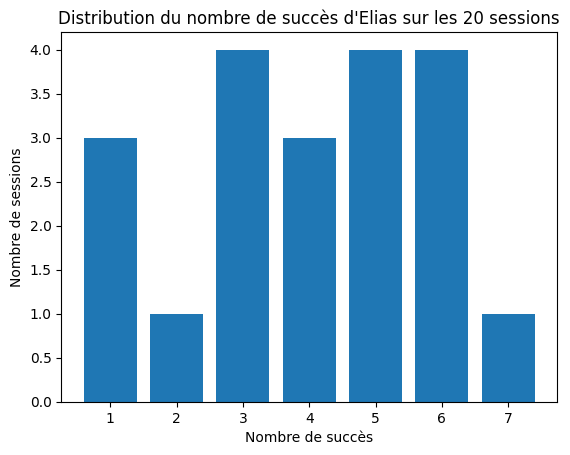

In [8]:
n=10
p1=0.4
vect_simu_bin1=st.binom.rvs(n,p1,size=20)
stats_reussites_elias=np.unique(vect_simu_bin1,return_counts=True)
plt.bar(stats_reussites_elias[0],stats_reussites_elias[1],label='Elias')
plt.xlabel('Nombre de succès')
plt.ylabel('Nombre de sessions')
plt.title('Distribution du nombre de succès d\'Elias sur les 20 sessions')

elias
2    1
3    5
4    6
5    5
6    2
8    1
Name: elias, dtype: int64
Axel
2    1
4    4
5    2
6    3
7    3
8    5
9    2
Name: Axel, dtype: int64


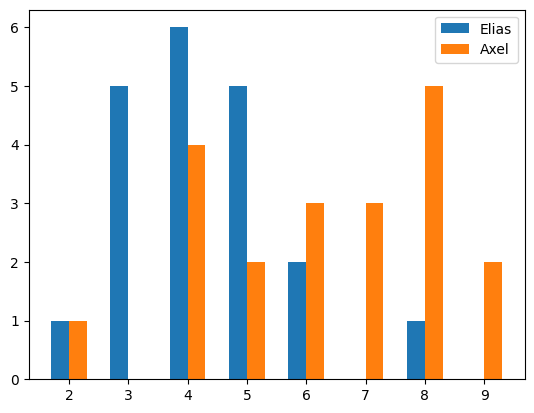

In [9]:
n=10
p1=0.4
p2=0.6
vect_simu_bin1=pd.Series(st.binom.rvs(n,p1,size=20),name='elias')
stats_reussites_elias=vect_simu_bin1.groupby(vect_simu_bin1).count()
#print(vect_simu_bin1)
print(stats_reussites_elias)
vect_simu_bin2=pd.Series(st.binom.rvs(n,p2,size=20),name='Axel')
stats_reussites_axel=vect_simu_bin2.groupby(vect_simu_bin2).count()
#print(vect_simu_bin2)
print(stats_reussites_axel)
width=0.3
plt.bar(stats_reussites_elias.index.values-width/2,stats_reussites_elias,width,label='Elias')
plt.bar(stats_reussites_axel.index.values+width/2,stats_reussites_axel,width,label='Axel')
plt.legend()

## Diagrammes circulaires

Ce type de diagramme est utilisé pour représenter le partage d'une population tout particulièrement dans le cas de variable qualitative. Ici on imagine un échantillon de réponses collecté sur deux questions posées quant au moyen de transport principal utilisé quotidiennement et sur la satisfaction ressentie quant au déroulement de ces trajets.

In [10]:
#Dans cette première cellule on effectue la simulation, ce n'est pas exigible
taille_echantillon=1000
moyens_transport=['deux roues non motorisés','Transport commun','voiture','marche','deux roues motorisés']
transport=np.random.choice(moyens_transport,size=taille_echantillon,p=[0.2,0.3,0.1,0.25,0.15])
probas=np.array([[0.2,0.3,0.2,0.15,0.15],[0.15,0.4,0.2,0.15,0.1],[0.2,0.2,0.2,0.2,0.2],[0.3,0.3,0.2,0.15,0.05],[0.15,0.3,0.2,0.25,0.1]])
type_humeurs=['très content', 'content','moyennement content','mécontent','très mécontent']
humeurs=[]
for el in transport :
    humeurs.append(np.random.choice(type_humeurs,size=1,p=probas[moyens_transport.index(el)])[0])
print(humeurs)
reponses=pd.DataFrame({'moyens_transport':transport,'humeurs':humeurs})
print(reponses)

['content', 'content', 'content', 'content', 'très content', 'moyennement content', 'mécontent', 'content', 'content', 'moyennement content', 'moyennement content', 'mécontent', 'mécontent', 'très content', 'très content', 'très mécontent', 'content', 'très mécontent', 'moyennement content', 'moyennement content', 'mécontent', 'mécontent', 'très content', 'content', 'moyennement content', 'très mécontent', 'content', 'très content', 'mécontent', 'moyennement content', 'très content', 'mécontent', 'moyennement content', 'très mécontent', 'très content', 'content', 'très mécontent', 'très content', 'mécontent', 'très content', 'mécontent', 'moyennement content', 'très content', 'très content', 'très content', 'content', 'très mécontent', 'moyennement content', 'très content', 'content', 'très mécontent', 'content', 'content', 'mécontent', 'mécontent', 'moyennement content', 'très content', 'content', 'moyennement content', 'très content', 'content', 'très content', 'très content', 'très 

La réalisation d'un diagramme circulaire s'effectue facilement lorsque l'effectif pour chaque modalité est connu. On utilise pour cela la méthode `plt.pie(effectifs,labels=modalités)`. On peut y rajouter l'argument `autopct` qui permet de paramétrer l'affichage des valeurs à représenter pour la répartition (on peut par exemple indiquer le paramètre `%.1f%%`si on veut faire apparaître le symbole `%` avec des parts données avec une précision d'une décimale)

                          humeurs
moyens_transport                 
Transport commun              305
deux roues motorisés          141
deux roues non motorisés      192
marche                        263
voiture                        99


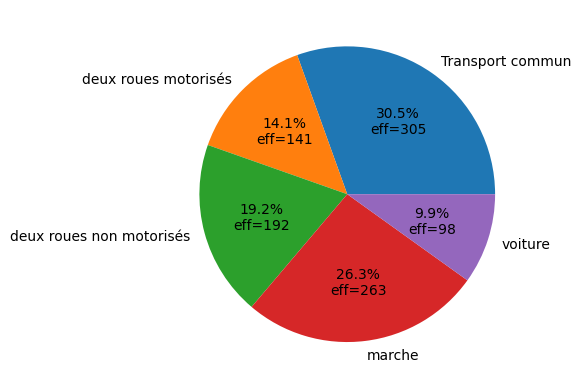

In [11]:
stats_transport=reponses.groupby(['moyens_transport']).count()
print(stats_transport)
plt.pie(stats_transport['humeurs'],labels=stats_transport.index.values,autopct=lambda pct:'{:.1f}%\neff={:d}'.format(pct,int(pct/100*stats_transport['humeurs'].sum())))
#ou plus simplement : autopct='%.1f%%' mais la maîtrise des formats n'est pas exigée
plt.show()

moyens_transport          humeurs            
Transport commun          très content            44
                          content                127
                          moyennement content     58
                          mécontent               44
                          très mécontent          32
deux roues motorisés      très content            13
                          content                 41
                          moyennement content     29
                          mécontent               43
                          très mécontent          15
deux roues non motorisés  très content            34
                          content                 60
                          moyennement content     44
                          mécontent               29
                          très mécontent          25
marche                    très content            78
                          content                 76
                          moyennement content     56


IndexError: Too many levels: Index has only 1 level, not 2

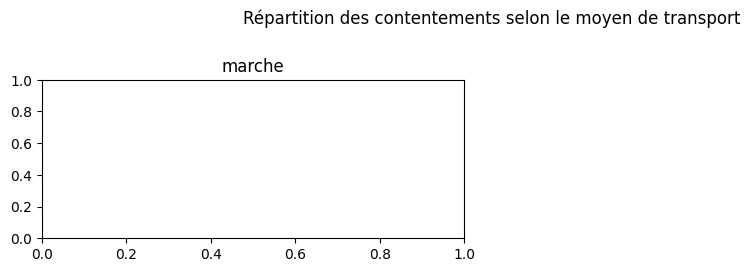

In [13]:
stats_par_transport=reponses.groupby(['moyens_transport','humeurs'])['humeurs'].count()
#Pour avoir un ordre logique dans les modalités d'humeurs sur les graphiques on utilise la méthode reindex :
stats_par_transport_reind=stats_par_transport.reindex(type_humeurs,level=1)
print(stats_par_transport_reind)
moyens=set()
for el in stats_par_transport_reind.index.get_level_values(0):
    moyens.add(el)
moyens=list(moyens)
print(stats_par_transport_reind.loc[moyens[0]])
print(stats_par_transport_reind.loc[(moyens[0],slice(None))].index.get_level_values(1))
#print(stats_par_transport.index.values)
fig=plt.figure(figsize=(12,7))
fig.suptitle('Répartition des contentements selon le moyen de transport', fontsize=12)
for i in range(1,6):
    plt.subplot(3,2,i)
    plt.title(moyens[i-1])
    plt.pie(stats_par_transport_reind.loc[moyens[i-1]],labels=stats_par_transport_reind.loc[(moyens[i-1],slice(None))].index.get_level_values(1),autopct='%.1f%%')
plt.show()

## Nuage de points

On utilise ce type de graphique pour étudier un lien possible entre deux variables quantitatives. On représente ici les résultats collectés sur un échantillon où ont été observés le nombre de pas effectués par les individus et la distance à pied parcourue. On utilise la méthode `plt.scatter` pour le réaliser\
On rajoute ci-dessous en rouge la droite de régression linéaire modélisant un lien entre les deux variables par une relation du type :\
Distance = a x Nb_pas + b

coef corrélation= 0.6571374464886578


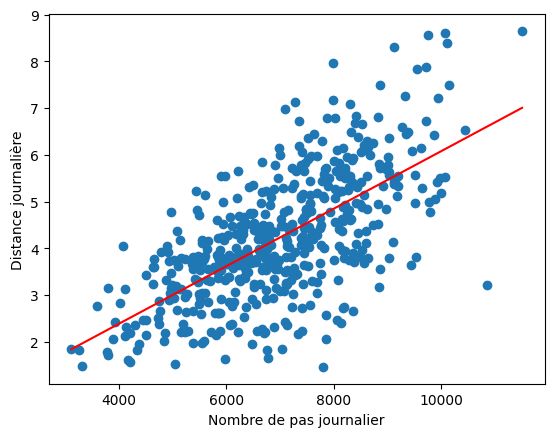

In [14]:
taille_ech,moy_pas,et_pas,moy_dist,et_dist=500,7000,1500,60,15
vect_simu_nb_pas=st.norm.rvs(moy_pas,et_pas,size=taille_ech)
vect_simu_dist=vect_simu_nb_pas*st.norm.rvs(moy_dist,et_dist,size=taille_ech)/100000 
plt.scatter(vect_simu_nb_pas,vect_simu_dist)
plt.xlabel('Nombre de pas journalier')
plt.ylabel('Distance journalière')
res=st.linregress(vect_simu_nb_pas,vect_simu_dist)
a=res.slope
b=res.intercept
coef_corr=res.rvalue
print('coef corrélation=',coef_corr)
plt.plot([vect_simu_nb_pas.min(),vect_simu_nb_pas.max()],[a*vect_simu_nb_pas.min()+b,a*vect_simu_nb_pas.max()+b],color='r')

## Représentation d'une série chronologique

La série va être naturellement représentée par une courbe indiquant le temps sur l'axe des abscisses. Pour cela nous allons utiliser la méthode `plt.plot` avec éventuellement le recours à la méthode `datetime64` de numpy pour convertir des données à un format de date exploitable comme tel. 

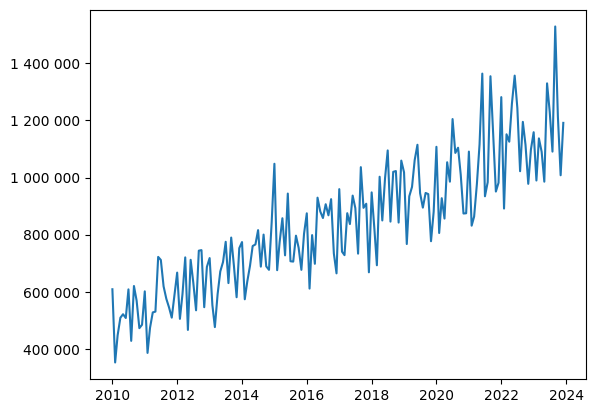

In [15]:
dates=[(i,j) for i in range(2010,2024) for j in range(1,13)]
sais=[1.13,0.82,0.92,0.97,1.03,1.13,1.08,0.98,1.08,0.97,0.92,0.97]#simulation d'une saisonnalité des résultats sur les différents mois d'une année
vect_simu=np.array([(50000*(date[0]+date[1]/12)-100000000)*sais[date[1]-1] for date in dates])*st.norm.rvs(1,0.1,size=len(dates))
x_graph=np.array([np.datetime64(str(date[0])+'-'+str(date[1]).zfill(2)) for date in dates])
#Les deux lignes ci-dessous permettent la mise en forme de l'axe des ordonnées, ce n'est pas exigible
#plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x,p:format(int(x))))#sans séparateur de milliers
plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x,p:format(int(x),',').replace(',',' ')))#Avec séparateur de milliers
plt.plot(x_graph,vect_simu)